In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("apple_dataset.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.128348,0.128906,0.128348,0.128348,469033600
1,0.122210,0.122210,0.121652,0.121652,175884800
2,0.113281,0.113281,0.112723,0.112723,105728000
3,0.115513,0.116071,0.115513,0.115513,86441600
4,0.118862,0.119420,0.118862,0.118862,73449600


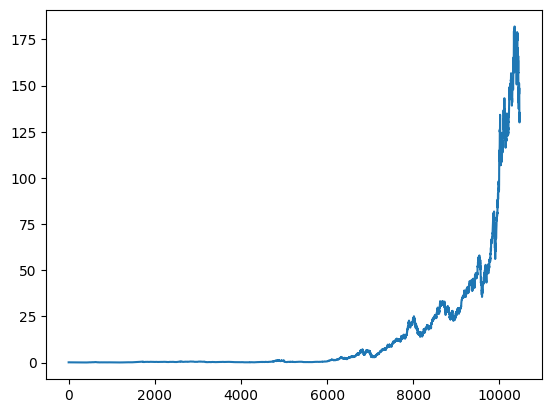

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10463    160.944701
10464    160.627201
10465    160.357401
10466    160.041801
10467    159.759601
Name: Close, Length: 10468, dtype: float64

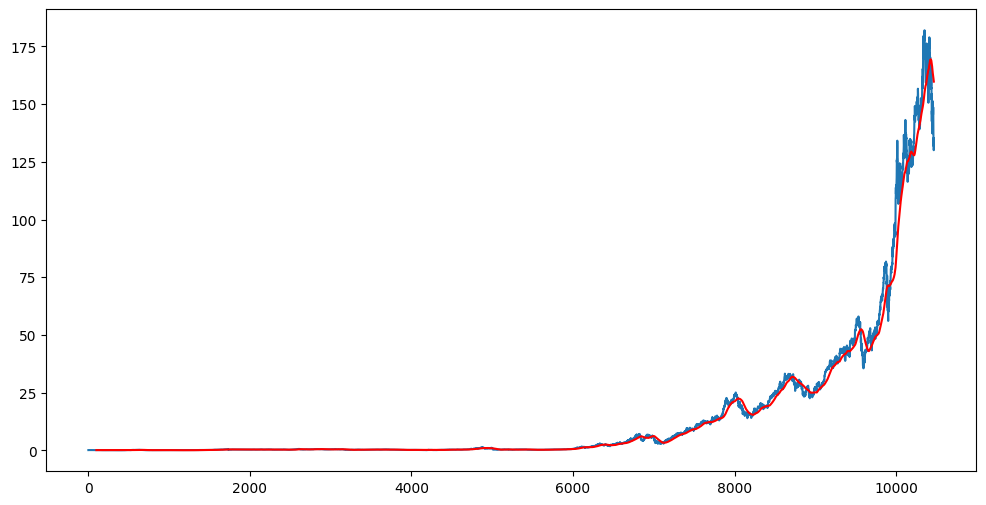

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
10463    159.30855
10464    159.22935
10465    159.14090
10466    159.03205
10467    158.92730
Name: Close, Length: 10468, dtype: float64

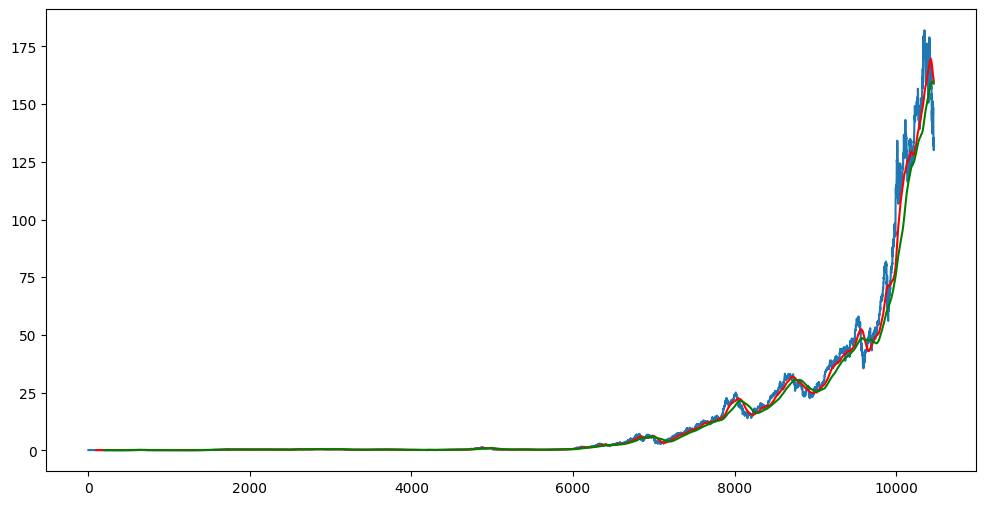

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(10468, 5)

In [ ]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(7327, 1)
(3141, 1)


In [ ]:
data_training.head()

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862


In [ ]:
data_testing.head()

,Close
7327,7.557500
7328,7.467857
7329,7.558571
7330,7.526071
7331,7.643214


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01068427],
       [0.00978143],
       [0.00857751],
       ...,
       [0.95820191],
       [0.96658081],
       [1.        ]])

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(7227, 100, 1)

In [ ]:
from keras.layers import Dense,Dropout,LSTM

from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           22200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           2

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
226/226 [==============================] - 112s 447ms/step - loss: 0.0081
Epoch 2/50
226/226 [==============================] - 122s 538ms/step - loss: 0.0032
Epoch 3/50
226/226 [==============================] - 140s 619ms/step - loss: 0.0025
Epoch 4/50
226/226 [==============================] - 159s 704ms/step - loss: 0.0024
Epoch 5/50
226/226 [==============================] - 150s 664ms/step - loss: 0.0023
Epoch 6/50
226/226 [==============================] - 112s 496ms/step - loss: 0.0023
Epoch 7/50
226/226 [==============================] - 100s 444ms/step - loss: 0.0022
Epoch 8/50
226/226 [==============================] - 100s 442ms/step - loss: 0.0019
Epoch 9/50
226/226 [==============================] - 100s 441ms/step - loss: 0.0017
Epoch 10/50
226/226 [==============================] - 103s 455ms/step - loss: 0.0018
Epoch 11/50
226/226 [==============================] - 103s 455ms/step - loss: 0.0016
Epoch 12/50
226/226 [==============================] - 102s 453

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
7327,7.557500
7328,7.467857
7329,7.558571
7330,7.526071
7331,7.643214


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-32-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [ ]:
final_df.head()

,Close
0,5.896786
1,5.853929
2,5.911071
3,5.882857
4,5.815357


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00111816],
       [0.00087508],
       [0.00119918],
       ...,
       [0.73580677],
       [0.70534914],
       [0.71385686]])

In [ ]:
input_data.shape

(3241, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3141, 100, 1)
(3141,)


In [ ]:
#making prediction
y_pred=model.predict(x_test)
y_pred.shape

99/99 [==============================] - 13s 120ms/step


(3141, 1)

In [ ]:
y_pred

array([[0.05758331],
       [0.05757606],
       [0.05759194],
       ...,
       [0.75202703],
       [0.73360515],
       [0.7160965 ]], dtype=float32)

In [ ]:
y_test

array([0.01053742, 0.01002899, 0.0105435 , ..., 0.73580677, 0.70534914,
       0.71385686])

In [ ]:
scaler.scale_

array([0.00567182])

In [ ]:
scale_factor=1/0.00567182

In [ ]:
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

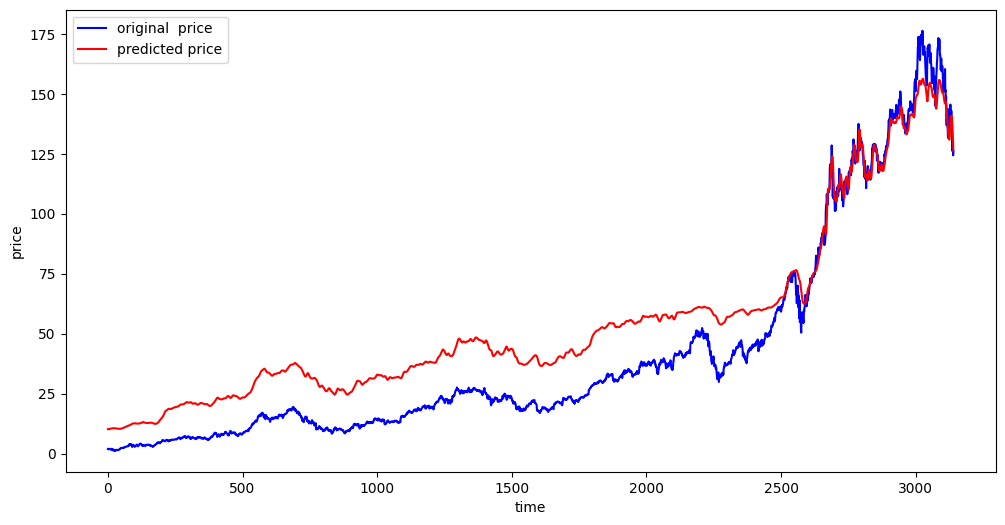

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original  price')
plt.plot(y_pred,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=23e639e07ea353911e91df15978db51d05a2173d9cb12e0615186d625ccebf25
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
